In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold 


In [2]:
#Read csv data
psyco = pd.read_csv("psyco1.csv")

In [3]:
psyco.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,Other/not working,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,0.089189,0.000000,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,Other/not working,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1.000000,0.999099,Complete Physical Attendance,No
2,19-25,Male,Student in College,Other/not working,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,0.990090,0.099099,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,Other/not working,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,0.089189,1.000000,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,Other/not working,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,0.909009,0.900000,Complete Physical Attendance,Yes


In [4]:
psyco1 = psyco.copy()
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,Other/not working,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,0.089189,0.000000,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,Other/not working,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1.000000,0.999099,Complete Physical Attendance,No
2,19-25,Male,Student in College,Other/not working,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,0.990090,0.099099,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,Other/not working,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,0.089189,1.000000,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,Other/not working,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,0.909009,0.900000,Complete Physical Attendance,Yes


In [5]:
prefer_not_to_say = psyco1[psyco1['gender'] == 'Prefer not to say']


half_length = len(prefer_not_to_say) // 2
first_half_indices = prefer_not_to_say.iloc[:half_length].index
second_half_indices = prefer_not_to_say.iloc[half_length:].index


psyco1.loc[first_half_indices, 'gender'] = 'Male'


psyco1.loc[second_half_indices, 'gender'] = 'Female'

In [6]:
psyco1['prod_inc'] = LabelEncoder().fit_transform(psyco1['prod_inc'])
psyco1['time_bp'] = LabelEncoder().fit_transform(psyco1['time_bp'])
psyco1['age'] = LabelEncoder().fit_transform(psyco1['age'])
psyco1['occupation'] = LabelEncoder().fit_transform(psyco1['occupation'])
psyco1['line_of_work'] = LabelEncoder().fit_transform(psyco1['line_of_work'])
psyco1['time_bp'] = LabelEncoder().fit_transform(psyco1['time_bp'])
psyco1['time_dp'] = LabelEncoder().fit_transform(psyco1['time_dp'])
psyco1['travel_time'] = LabelEncoder().fit_transform(psyco1['travel_time'])
psyco1['easeof_online'] = LabelEncoder().fit_transform(psyco1['easeof_online'])
psyco1['home_env'] = LabelEncoder().fit_transform(psyco1['home_env'])
psyco1['prod_inc'] = LabelEncoder().fit_transform(psyco1['prod_inc'])
psyco1['sleep_bal'] = LabelEncoder().fit_transform(psyco1['sleep_bal'])
psyco1['new_skill'] = LabelEncoder().fit_transform(psyco1['new_skill'])
psyco1['fam_connect'] = LabelEncoder().fit_transform(psyco1['fam_connect'])
psyco1['relaxed'] = LabelEncoder().fit_transform(psyco1['relaxed'])
psyco1['self_time'] = LabelEncoder().fit_transform(psyco1['self_time'])
psyco1['like_hw'] = LabelEncoder().fit_transform(psyco1['like_hw'])
psyco1['dislike_hw'] = LabelEncoder().fit_transform(psyco1['dislike_hw'])
psyco1['prefer'] = LabelEncoder().fit_transform(psyco1['prefer'])
psyco1['certaindays_hw'] = LabelEncoder().fit_transform(psyco1['certaindays_hw'])
psyco1['gender'] = LabelEncoder().fit_transform(psyco1['gender'])

In [7]:
psyco2 = psyco.copy()

In [8]:
psyco2.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,Other/not working,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,0.089189,0.000000,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,Other/not working,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1.000000,0.999099,Complete Physical Attendance,No
2,19-25,Male,Student in College,Other/not working,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,0.990090,0.099099,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,Other/not working,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,0.089189,1.000000,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,Other/not working,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,0.909009,0.900000,Complete Physical Attendance,Yes


In [9]:
psyco2[psyco2['gender'] == 'Prefer not to say']


,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
45,60+,Prefer not to say,Entrepreneur,Other/not working,12,12,3.0,5,5,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.008108,Complete Physical Attendance,No
72,19-25,Prefer not to say,Retired/Senior Citizen,Other/not working,4,9,2.5,3,3,0.5,-1.0,0.0,0.0,-1.0,0.0,0.900000,0.089189,Complete Physical Attendance,Maybe
133,0-18,Prefer not to say,Student in School,Other/not working,9,11,1.5,2,4,0.0,-1.0,1.0,0.5,-1.0,-1.0,0.900901,1.000000,Work/study from home,Yes
207,60+,Prefer not to say,Homemaker,Other/not working,12,12,3.0,1,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.000000,1.000000,Complete Physical Attendance,Maybe
220,0-18,Prefer not to say,Student in School,Other/not working,7,4,0.5,1,1,-0.5,-1.0,-0.5,0.0,0.0,0.5,0.000000,0.008108,Work/study from home,Yes
239,19-25,Prefer not to say,Student in College,Other/not working,7,7,0.5,1,3,1.0,0.5,1.0,1.0,1.0,1.0,0.089189,0.008108,Work/study from home,Yes
284,33-40,Prefer not to say,Entrepreneur,Other/not working,9,9,0.5,2,1,1.0,-0.5,1.0,1.0,1.0,1.0,0.999099,0.900901,Complete Physical Attendance,Maybe
332,26-32,Prefer not to say,Working Professional,Management,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.900901,Complete Physical Attendance,Maybe


In [10]:
prefer_not_to_say = psyco2[psyco2['gender'] == 'Prefer not to say']


half_length = len(prefer_not_to_say) // 2
first_half_indices = prefer_not_to_say.iloc[:half_length].index
second_half_indices = prefer_not_to_say.iloc[half_length:].index


psyco2.loc[first_half_indices, 'gender'] = 'Male'


psyco2.loc[second_half_indices, 'gender'] = 'Female'


In [11]:
psyco2['gender'].value_counts()

Male      653
Female    522
Name: gender, dtype: int64

In [12]:

# Columns to one-hot encode
#columns_to_encode = ['dislike_hw', 'certaindays_hw', 'occupation', 'line_of_work', 'prefer']
#columns_to_encode = ['occupation', 'line_of_work', 'prefer', 'certaindays_hw']
columns_to_encode = ['dislike_hw', 'certaindays_hw', 'occupation', 'line_of_work', 'prefer', 'like_hw']

# Perform one-hot encoding


psyco2['prod_inc'] = LabelEncoder().fit_transform(psyco2['prod_inc'])
psyco2['time_bp'] = LabelEncoder().fit_transform(psyco2['time_bp'])
psyco2['age'] = LabelEncoder().fit_transform(psyco2['age'])
psyco2['time_bp'] = LabelEncoder().fit_transform(psyco2['time_bp'])
psyco2['time_dp'] = LabelEncoder().fit_transform(psyco2['time_dp'])
psyco2['travel_time'] = LabelEncoder().fit_transform(psyco2['travel_time'])
psyco2['easeof_online'] = LabelEncoder().fit_transform(psyco2['easeof_online'])
psyco2['home_env'] = LabelEncoder().fit_transform(psyco2['home_env'])
psyco2['prod_inc'] = LabelEncoder().fit_transform(psyco2['prod_inc'])
psyco2['sleep_bal'] = LabelEncoder().fit_transform(psyco2['sleep_bal'])
psyco2['new_skill'] = LabelEncoder().fit_transform(psyco2['new_skill'])
psyco2['fam_connect'] = LabelEncoder().fit_transform(psyco2['fam_connect'])
psyco2['relaxed'] = LabelEncoder().fit_transform(psyco2['relaxed'])
psyco2['self_time'] = LabelEncoder().fit_transform(psyco2['self_time'])
psyco2['like_hw'] = LabelEncoder().fit_transform(psyco2['like_hw'])
psyco2['dislike_hw'] = LabelEncoder().fit_transform(psyco2['dislike_hw'])
psyco2['gender'] = LabelEncoder().fit_transform(psyco2['gender'])

# Display the resulting DataFrame with one-hot encoded columns
encoded_df = pd.get_dummies(psyco2, columns=columns_to_encode)
#encoded_df = encoded_df.drop(columns=['like_hw', 'dislike_hw'])
encoded_df.head()

,age,gender,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,...,like_hw_5,like_hw_6,like_hw_7,like_hw_8,like_hw_9,like_hw_10,like_hw_11,like_hw_12,like_hw_13,like_hw_14
0,1,1,2,1,0,2,2,2,2,3,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,4,0,3,1,1,3,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,2,2,1,1,1,4,2,3,...,0,0,0,0,0,0,1,0,0,0
3,1,1,2,2,1,2,0,2,4,3,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,2,1,1,1,2,2,2,...,0,0,0,0,1,0,0,0,0,0


In [13]:
X1 = encoded_df.drop(columns=['gender'])
y1 = encoded_df['gender']

In [14]:
X2 = psyco1.drop(columns=['gender'])
y2 = encoded_df['gender']

In [15]:
def plot_roc_auc(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



In [16]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    if title:
        plt.title(title)
    plt.show()

In [17]:
def multiclass_cv_decision_tree(X, y, cv=5, scoring='f1_macro', max_depth=None, random_state=12):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')

    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)
    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    AUC_score = roc_auc_score(y, y_pred)
    plot_roc_auc(y, y_pred)
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("Decision Tree - Cross-Validation AUC_score:", AUC_score)
    print("Decision Tree - Cross-Validation Accuracy:", accuracy)
    print("Decision Tree - Cross-Validation Classification Report:\n", classification_rep)
    print("Decision Tree - Cross-Validation F1 Scores:", scores)
    print("Decision Tree - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores, accuracy, AUC_score

In [18]:
def knn_elbow_cv(X, y, cv=10, scoring='f1_macro', random_state=12, max_neighbors=20):
    cv_scores = []

    # Range of neighbors (k) to consider
    neighbors_range = range(2, max_neighbors + 1)

    for k in neighbors_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
        cv_scores.append(scores.mean())
    
    # Find the optimal number of neighbors (k) using the elbow method
    optimal_k = neighbors_range[np.argmax(cv_scores)]

    # Plot the elbow curve
    plt.figure()
    plt.plot(neighbors_range, cv_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(f'{scoring} Score')
    plt.title('KNN Elbow Plot')
    plt.grid(True)
    plt.show()

    # Train a KNN classifier with the optimal k
    optimal_clf = KNeighborsClassifier(n_neighbors=optimal_k)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(optimal_clf, X, y, cv=cv_strategy, scoring=scoring)
    y_pred = cross_val_predict(optimal_clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')

    AUC_score = roc_auc_score(y, y_pred)
    plot_roc_auc(y, y_pred)
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print(f"Optimal k: {optimal_k}")
    print("KNN - Cross-Validation AUC_score:", AUC_score)
    print("KNN - Cross-Validation Accuracy:", accuracy)
    print("KNN - Cross-Validation Classification Report:\n", classification_rep)
    print("KNN - Cross-Validation F1 Scores:", scores)
    print("KNN - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores, accuracy, AUC_score

In [19]:
def multiclass_cv_logistic_regression(X, y, cv=10, scoring='f1_macro', random_state=12, solver='lbfgs', max_iter=100):

    clf = LogisticRegression(solver=solver, max_iter=max_iter, random_state=random_state)
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)

    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    AUC_score = roc_auc_score(y, y_pred)
    plot_roc_auc(y, y_pred)
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("Logistic - Cross-Validation AUC_score:", AUC_score)
    print("Logistic - Cross-Validation Accuracy:", accuracy)
    print("Logistic - Cross-Validation Classification Report:\n", classification_rep)
    print("Logistic - Cross-Validation F1 Scores:", scores)
    print("Logistic - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores, accuracy, AUC_score


In [20]:
def multiclass_cv_svm(X, y, cv=10, scoring='f1_macro', random_state=12, kernel='rbf', C=1.0, gamma='scale'):

    clf = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)

    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    AUC_score = roc_auc_score(y, y_pred)
    plot_roc_auc(y, y_pred)
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("SVM - Cross-Validation AUC_score:", AUC_score)
    print("SVM - Cross-Validation Accuracy:", accuracy)
    print("SVM - Cross-Validation Classification Report:\n", classification_rep)
    print("SVM - Cross-Validation F1 Scores:", scores)
    print("SVM - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores, accuracy, AUC_score


In [21]:
def multiclass_cv_mlp(X, y, cv=10, scoring='f1_macro', hidden_layer_sizes=(150,), max_iter=100, random_state=12):
 

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=12)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)


    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    AUC_score = roc_auc_score(y, y_pred)
    plot_roc_auc(y, y_pred)
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("MLP - Cross-Validation AUC_score:", AUC_score)
    print(f"MLP - Accuracy: {accuracy}")
    print("MLP - Classification Report:")
    print(classification_rep)
    print("MLP - Cross-Validation F1 Scores:", scores)
    print("MLP - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores, accuracy, AUC_score

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

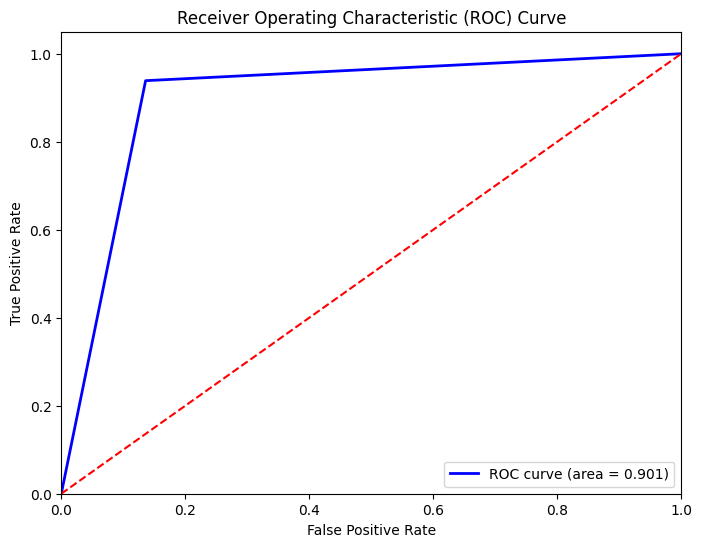

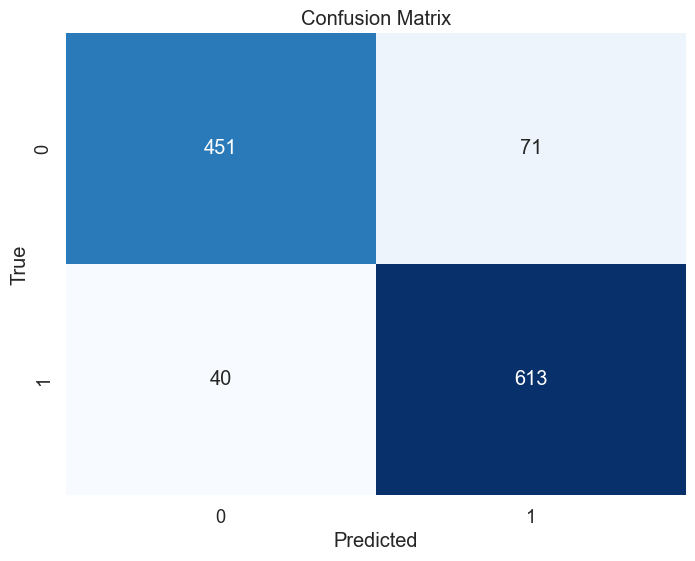

MLP - Cross-Validation AUC_score: 0.9013644658018107
MLP - Accuracy: 0.9055319148936171
MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       522
           1       0.90      0.94      0.92       653

    accuracy                           0.91      1175
   macro avg       0.91      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

MLP - Cross-Validation F1 Scores: [0.86690729 0.93994911 0.92211221 0.90524856 0.89685315 0.92161096
 0.9131016  0.89615385 0.89522388 0.87776119]
MLP - Cross-Validation Average F1 Score with variance: (0.9034921795187156, 0.0004266360052678444)


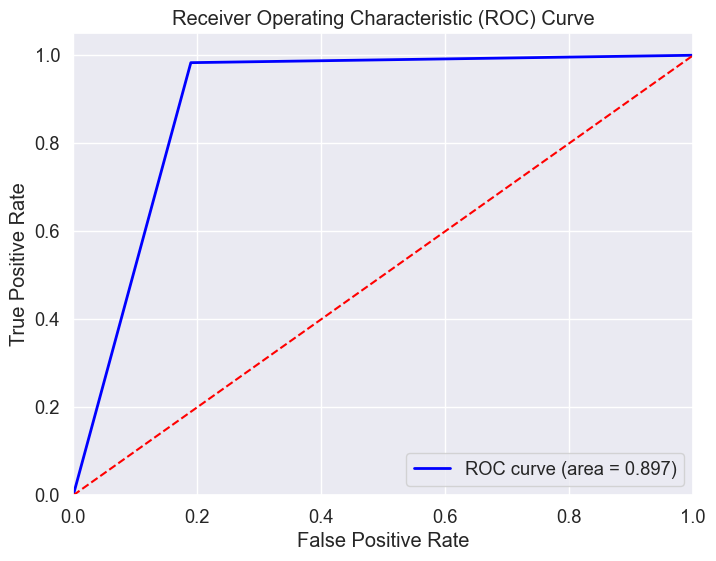

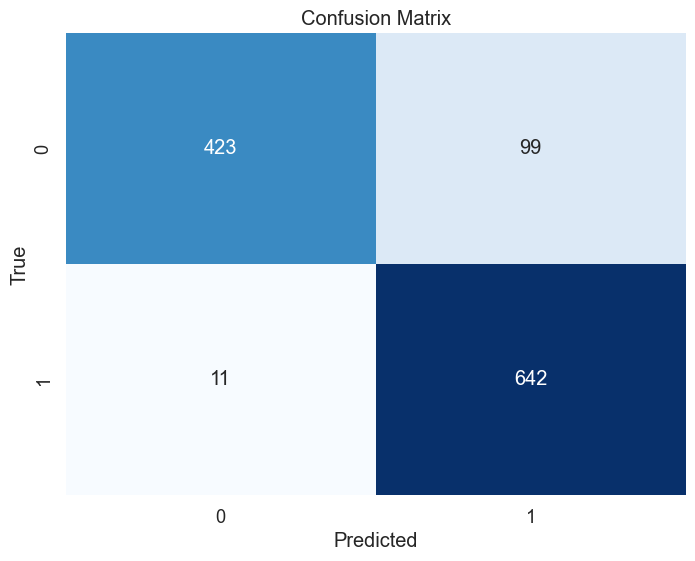

SVM - Cross-Validation AUC_score: 0.8967497491682949
SVM - Cross-Validation Accuracy: 0.9063829787234042
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       522
           1       0.87      0.98      0.92       653

    accuracy                           0.91      1175
   macro avg       0.92      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

SVM - Cross-Validation F1 Scores: [0.90309817 0.88465298 0.87427702 0.89529725 0.92169874 0.91168478
 0.92121212 0.93872054 0.88481636 0.89252909]
SVM - Cross-Validation Average F1 Score with variance: (0.9027987045231374, 0.0003693551071040771)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

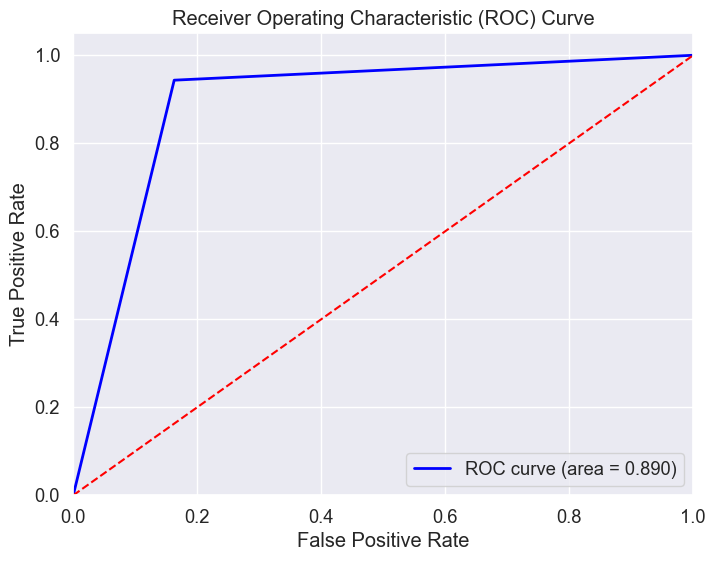

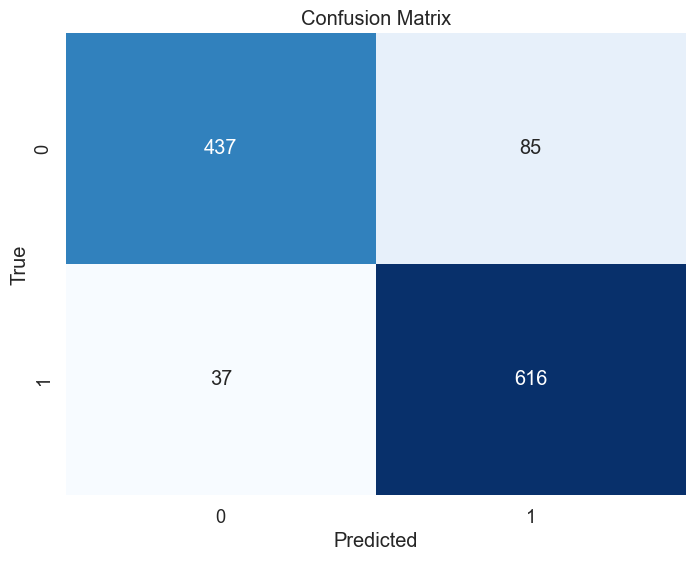

Logistic - Cross-Validation AUC_score: 0.8902515944682075
Logistic - Cross-Validation Accuracy: 0.8961702127659574
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       522
           1       0.88      0.94      0.91       653

    accuracy                           0.90      1175
   macro avg       0.90      0.89      0.89      1175
weighted avg       0.90      0.90      0.90      1175

Logistic - Cross-Validation F1 Scores: [0.85024263 0.94820018 0.91274771 0.89588235 0.90524856 0.86096257
 0.89402174 0.87834225 0.89465786 0.89522388]
Logistic - Cross-Validation Average F1 Score with variance: (0.8935529718154637, 0.0006670486563590575)


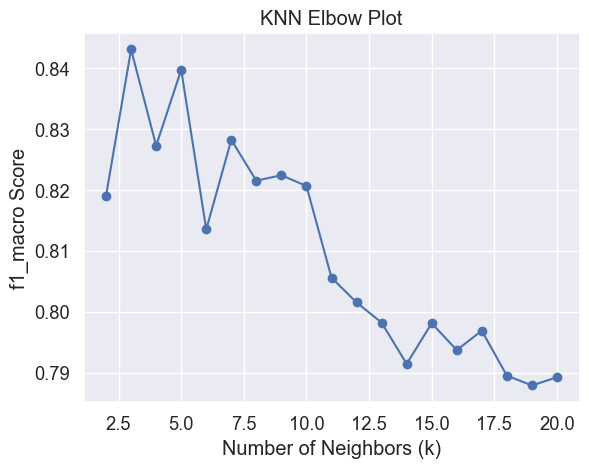

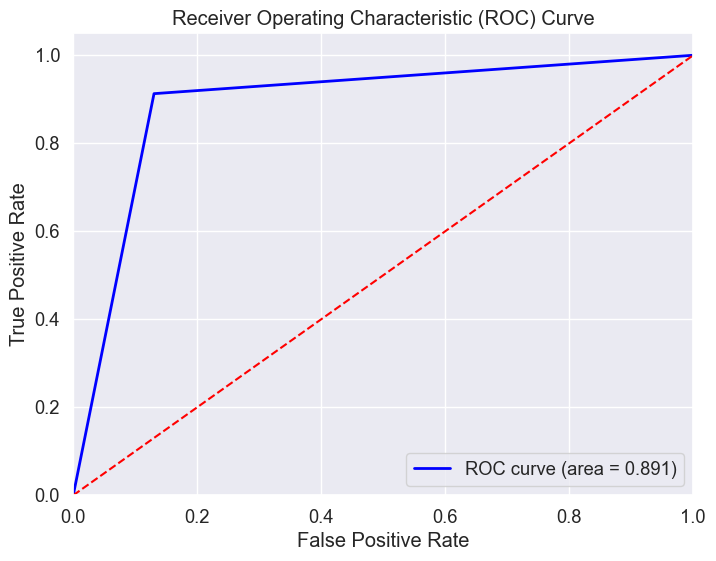

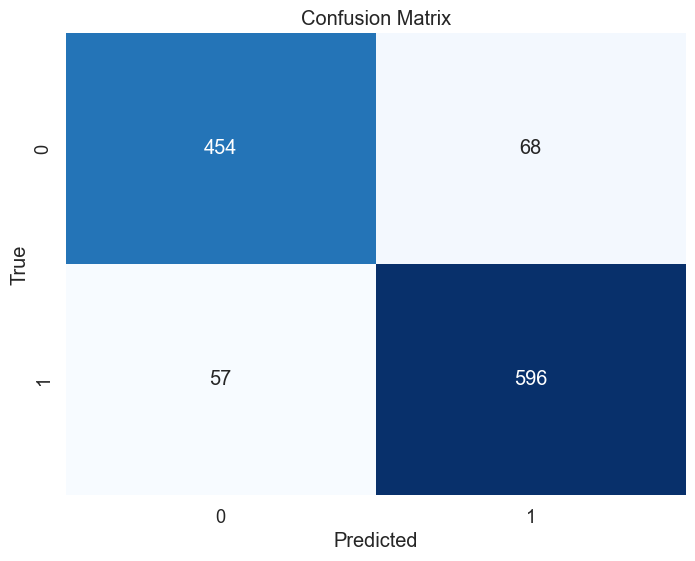

Optimal k: 3
KNN - Cross-Validation AUC_score: 0.8912211836909518
KNN - Cross-Validation Accuracy: 0.8936170212765957
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       522
           1       0.90      0.91      0.91       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

KNN - Cross-Validation F1 Scores: [0.83557022 0.94015794 0.91323529 0.91436865 0.92169874 0.86299766
 0.93076923 0.87884615 0.88554444 0.83524791]
KNN - Cross-Validation Average F1 Score with variance: (0.8918436228185813, 0.001311625853457748)


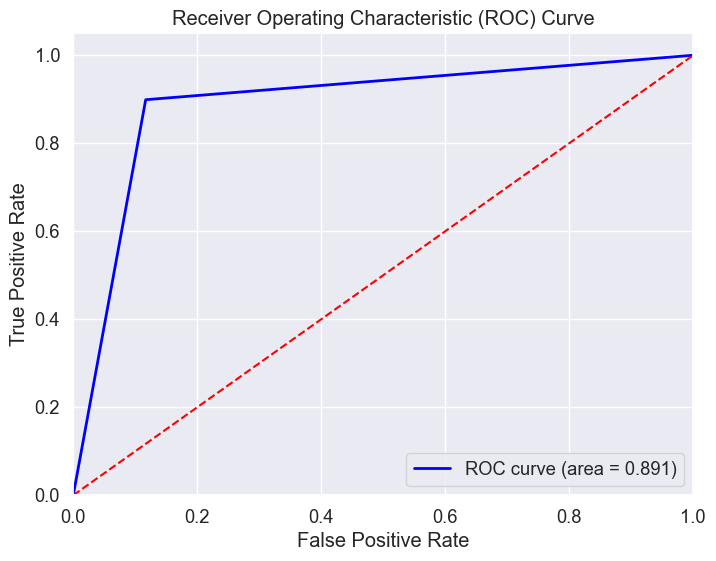

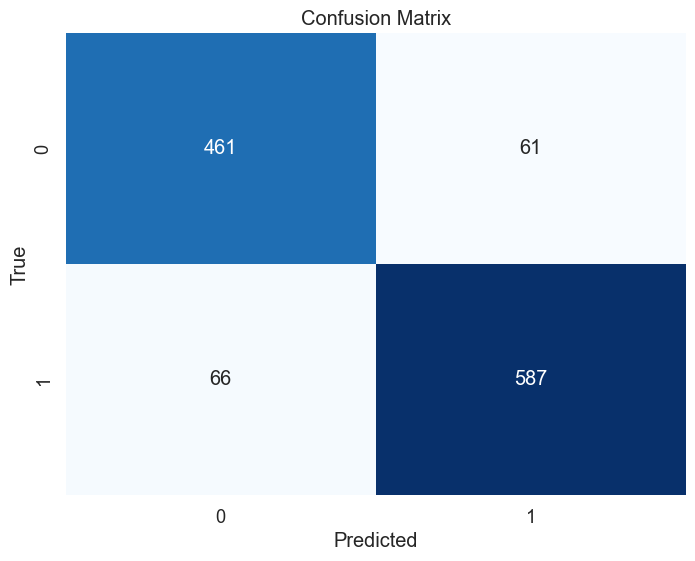

Decision Tree - Cross-Validation AUC_score: 0.8910348934772022
Decision Tree - Cross-Validation Accuracy: 0.8919148936170213
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       522
           1       0.91      0.90      0.90       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

Decision Tree - Cross-Validation F1 Scores: [0.90493528 0.90373157 0.89249575 0.90141359 0.88847109]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.8982094522832116, 4.2695826316298775e-05)


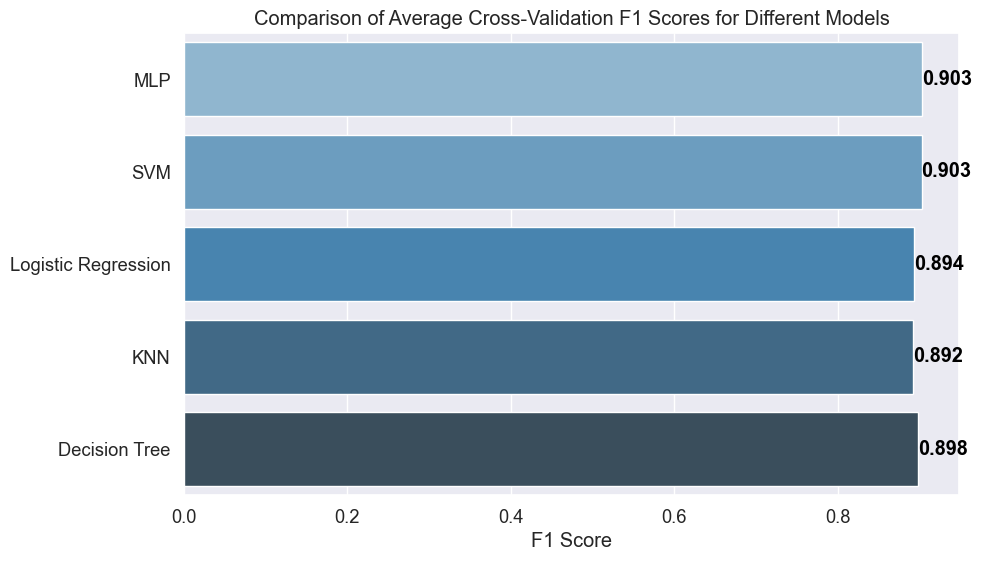

In [22]:
f1_scores = []
functions = [multiclass_cv_mlp, multiclass_cv_svm, multiclass_cv_logistic_regression, knn_elbow_cv, multiclass_cv_decision_tree]

for func in functions:
    f1 = func(X1, y1)[0].mean()
    f1_scores.append(f1)

# Create labels for the bar plot
labels = ["MLP", "SVM", "Logistic Regression", "KNN", "Decision Tree"]

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=f1_scores, y=labels, palette="Blues_d")
plt.xlabel('F1 Score')
plt.title('Comparison of Average Cross-Validation F1 Scores for Different Models')

# Add values on top of the bars with 3 decimal places
for i, v in enumerate(f1_scores):
    ax.text(v, i, f'{v:.3f}', va='center', color='black', fontweight='bold')

plt.show()

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

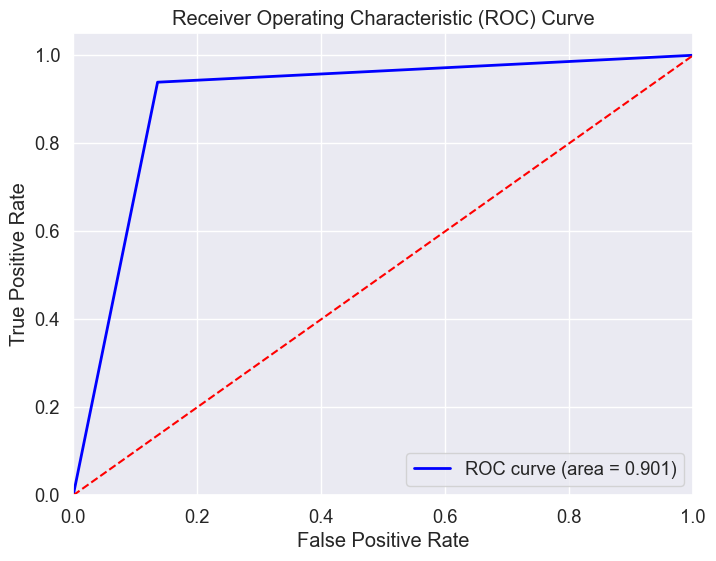

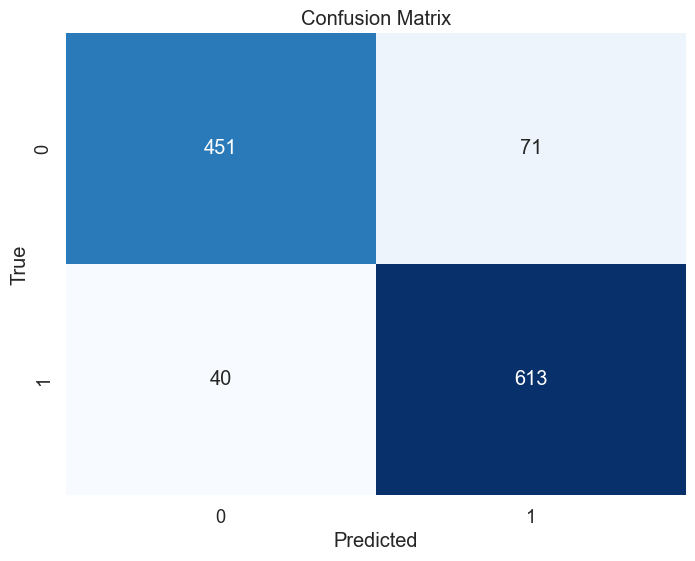

MLP - Cross-Validation AUC_score: 0.9013644658018107
MLP - Accuracy: 0.9055319148936171
MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       522
           1       0.90      0.94      0.92       653

    accuracy                           0.91      1175
   macro avg       0.91      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

MLP - Cross-Validation F1 Scores: [0.86690729 0.93994911 0.92211221 0.90524856 0.89685315 0.92161096
 0.9131016  0.89615385 0.89522388 0.87776119]
MLP - Cross-Validation Average F1 Score with variance: (0.9034921795187156, 0.0004266360052678444)


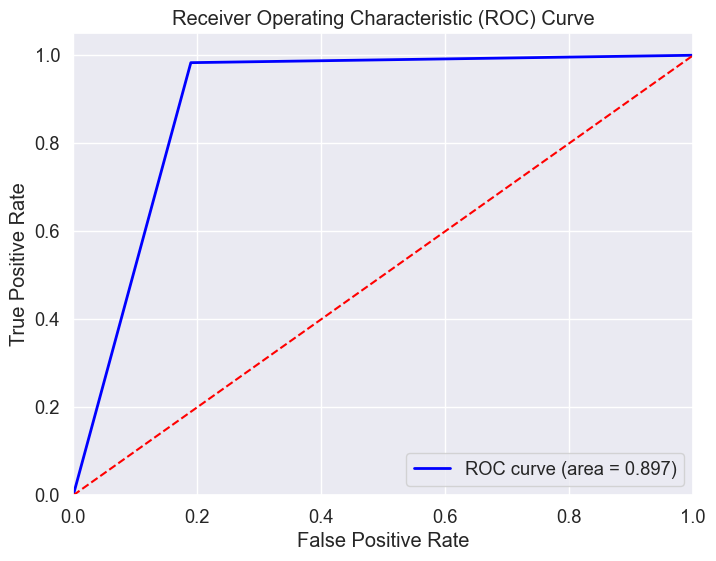

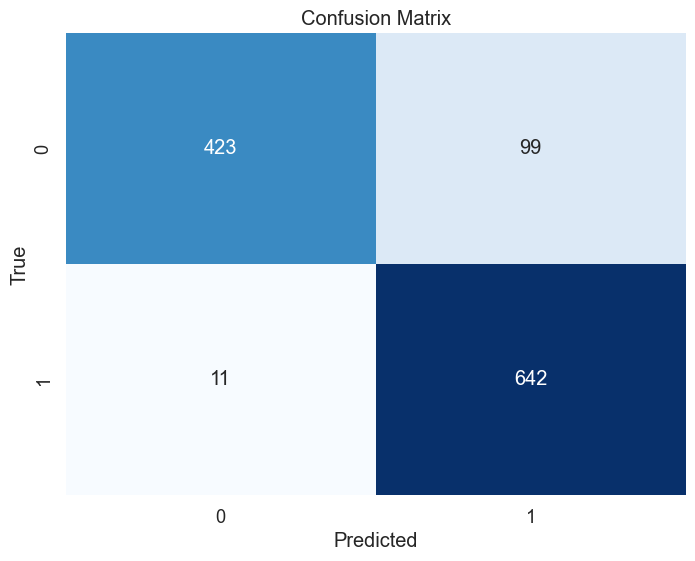

SVM - Cross-Validation AUC_score: 0.8967497491682949
SVM - Cross-Validation Accuracy: 0.9063829787234042
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       522
           1       0.87      0.98      0.92       653

    accuracy                           0.91      1175
   macro avg       0.92      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

SVM - Cross-Validation F1 Scores: [0.90309817 0.88465298 0.87427702 0.89529725 0.92169874 0.91168478
 0.92121212 0.93872054 0.88481636 0.89252909]
SVM - Cross-Validation Average F1 Score with variance: (0.9027987045231374, 0.0003693551071040771)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

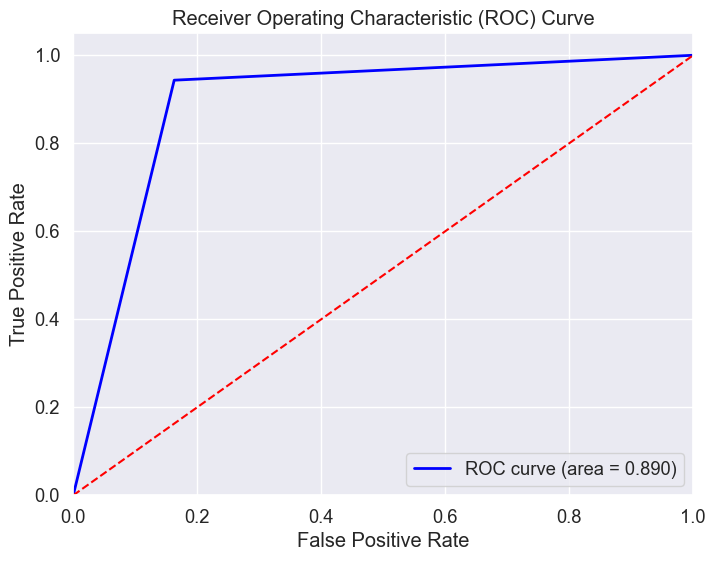

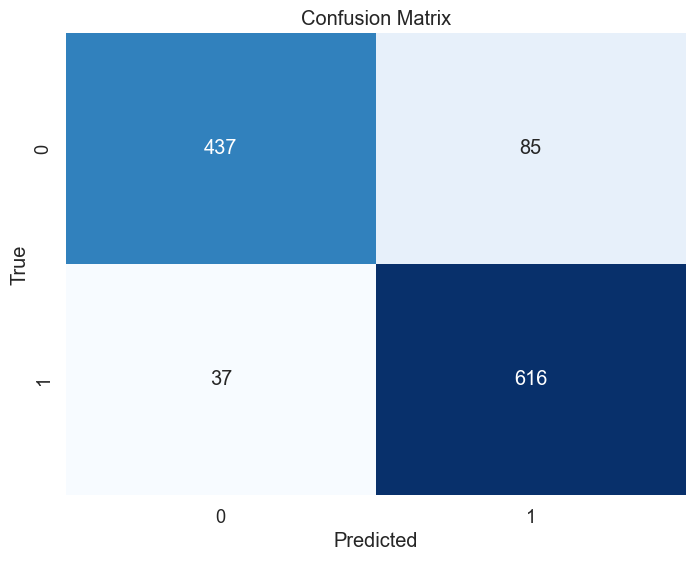

Logistic - Cross-Validation AUC_score: 0.8902515944682075
Logistic - Cross-Validation Accuracy: 0.8961702127659574
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       522
           1       0.88      0.94      0.91       653

    accuracy                           0.90      1175
   macro avg       0.90      0.89      0.89      1175
weighted avg       0.90      0.90      0.90      1175

Logistic - Cross-Validation F1 Scores: [0.85024263 0.94820018 0.91274771 0.89588235 0.90524856 0.86096257
 0.89402174 0.87834225 0.89465786 0.89522388]
Logistic - Cross-Validation Average F1 Score with variance: (0.8935529718154637, 0.0006670486563590575)


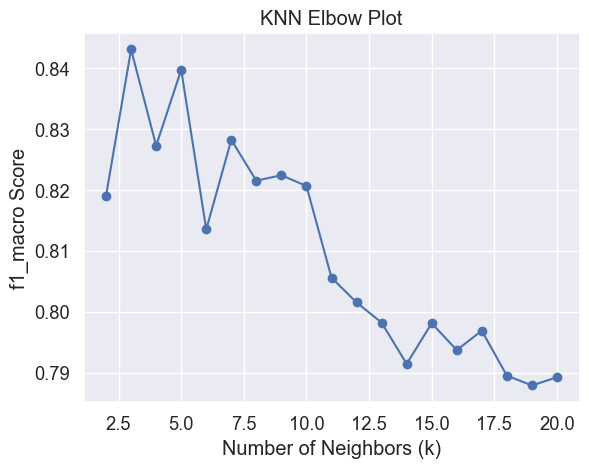

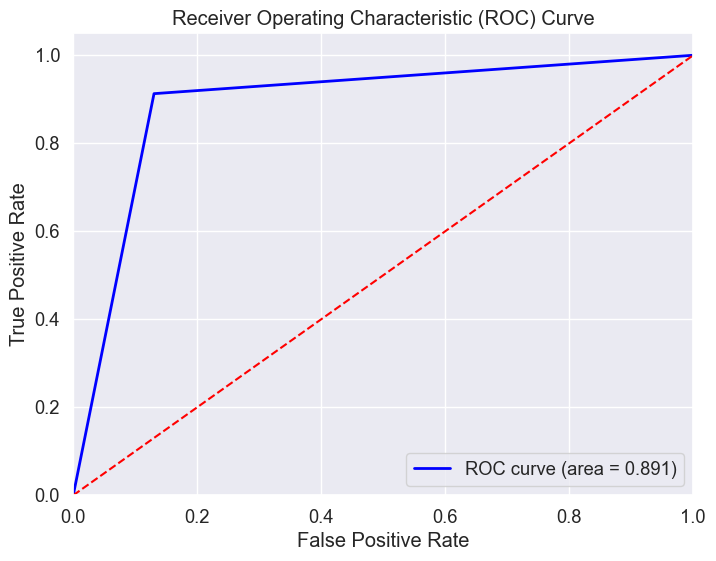

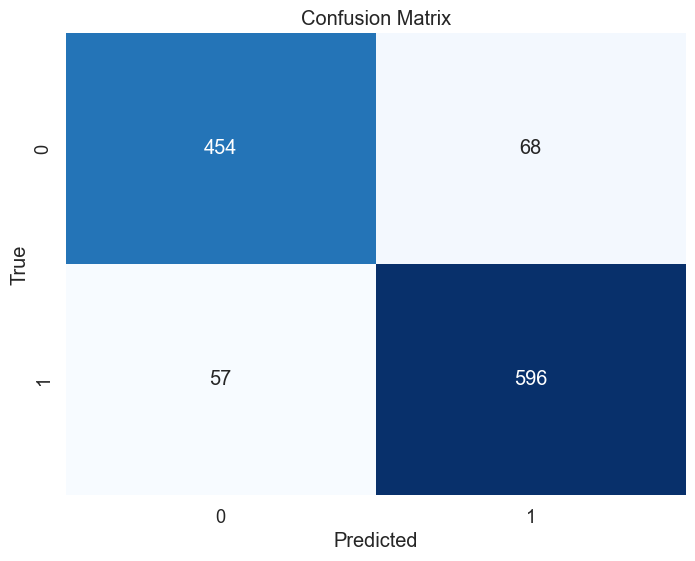

Optimal k: 3
KNN - Cross-Validation AUC_score: 0.8912211836909518
KNN - Cross-Validation Accuracy: 0.8936170212765957
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       522
           1       0.90      0.91      0.91       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

KNN - Cross-Validation F1 Scores: [0.83557022 0.94015794 0.91323529 0.91436865 0.92169874 0.86299766
 0.93076923 0.87884615 0.88554444 0.83524791]
KNN - Cross-Validation Average F1 Score with variance: (0.8918436228185813, 0.001311625853457748)


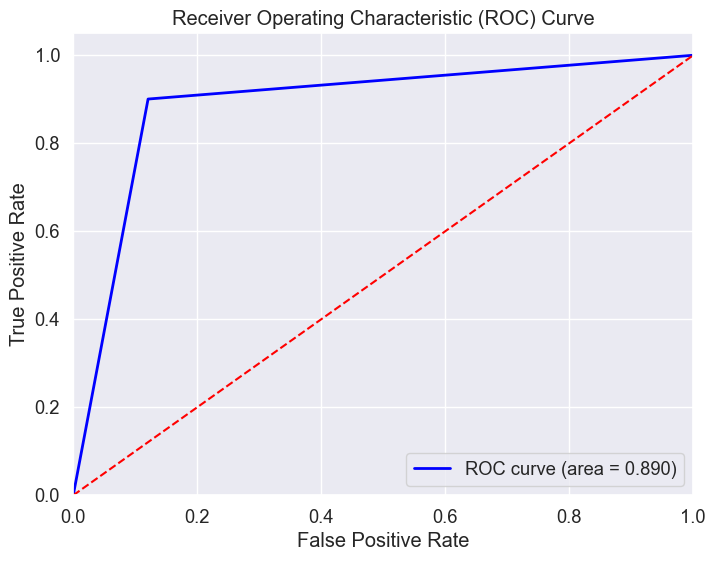

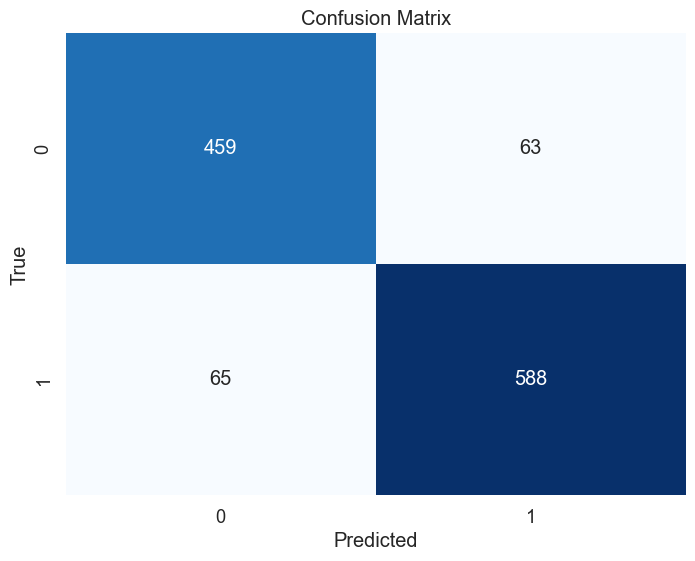

Decision Tree - Cross-Validation AUC_score: 0.8898848814490152
Decision Tree - Cross-Validation Accuracy: 0.8910638297872341
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       522
           1       0.90      0.90      0.90       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

Decision Tree - Cross-Validation F1 Scores: [0.90091477 0.89076068 0.8796987  0.88863371 0.88847109]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.8896957897192838, 4.59138670877204e-05)


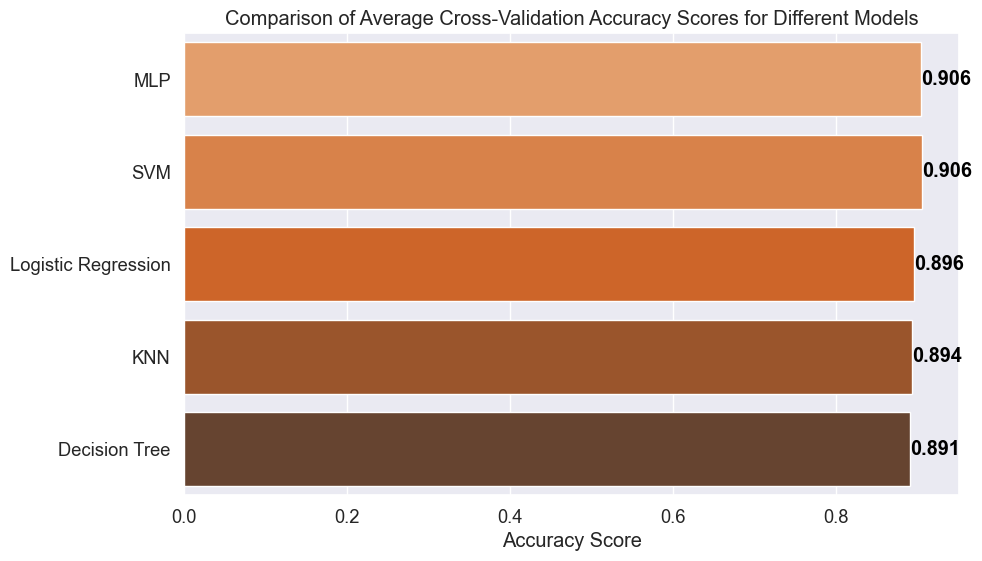

In [23]:
a_scores = []

for func in functions:
    a = func(X1, y1)[1]
    a_scores.append(a)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=a_scores, y=labels, palette="Oranges_d")
plt.xlabel('Accuracy Score')
plt.title('Comparison of Average Cross-Validation Accuracy Scores for Different Models')

# Add values on top of the bars with 3 decimal places
for i, v in enumerate(a_scores):
    ax.text(v, i, f'{v:.3f}', va='center', color='black', fontweight='bold')

plt.show()

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

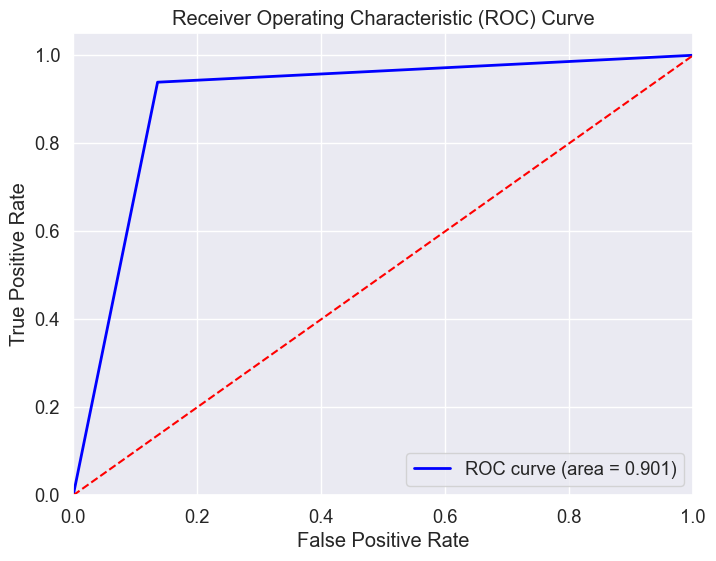

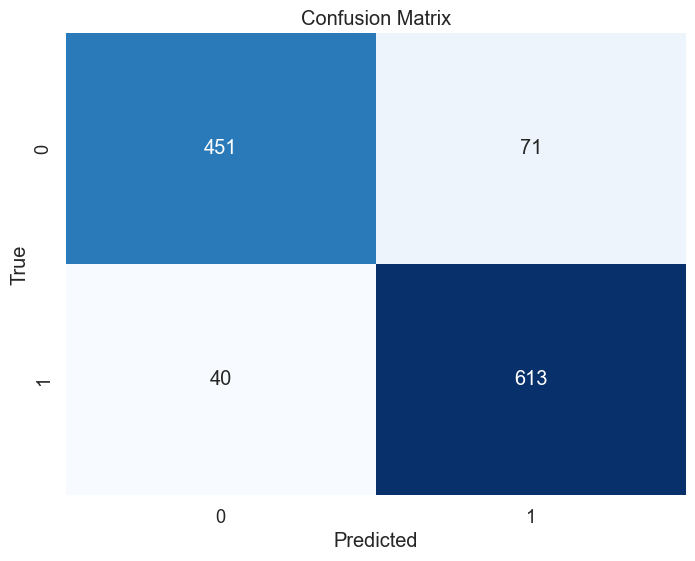

MLP - Cross-Validation AUC_score: 0.9013644658018107
MLP - Accuracy: 0.9055319148936171
MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       522
           1       0.90      0.94      0.92       653

    accuracy                           0.91      1175
   macro avg       0.91      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

MLP - Cross-Validation F1 Scores: [0.86690729 0.93994911 0.92211221 0.90524856 0.89685315 0.92161096
 0.9131016  0.89615385 0.89522388 0.87776119]
MLP - Cross-Validation Average F1 Score with variance: (0.9034921795187156, 0.0004266360052678444)


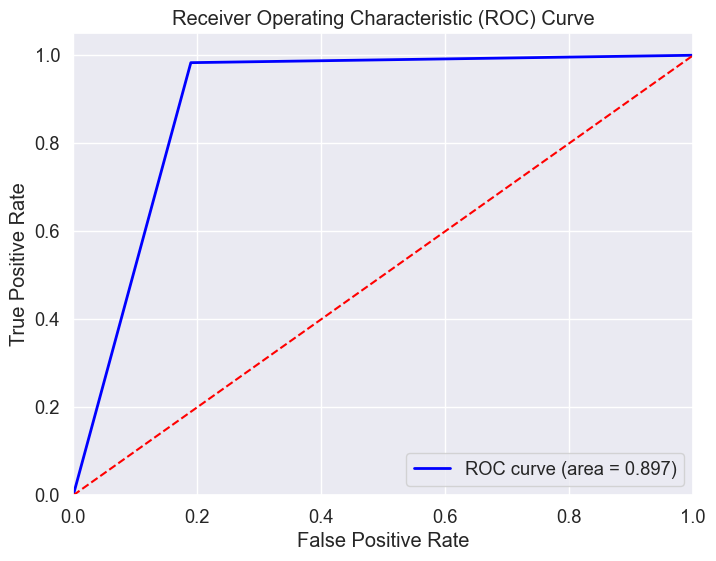

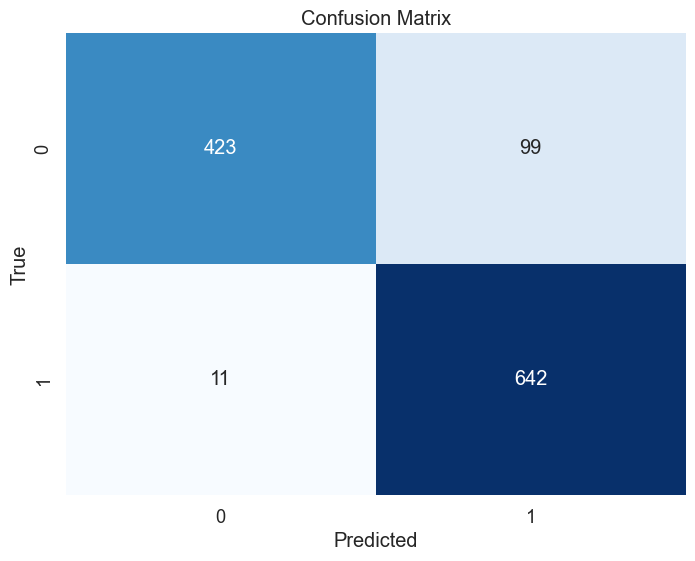

SVM - Cross-Validation AUC_score: 0.8967497491682949
SVM - Cross-Validation Accuracy: 0.9063829787234042
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       522
           1       0.87      0.98      0.92       653

    accuracy                           0.91      1175
   macro avg       0.92      0.90      0.90      1175
weighted avg       0.91      0.91      0.91      1175

SVM - Cross-Validation F1 Scores: [0.90309817 0.88465298 0.87427702 0.89529725 0.92169874 0.91168478
 0.92121212 0.93872054 0.88481636 0.89252909]
SVM - Cross-Validation Average F1 Score with variance: (0.9027987045231374, 0.0003693551071040771)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

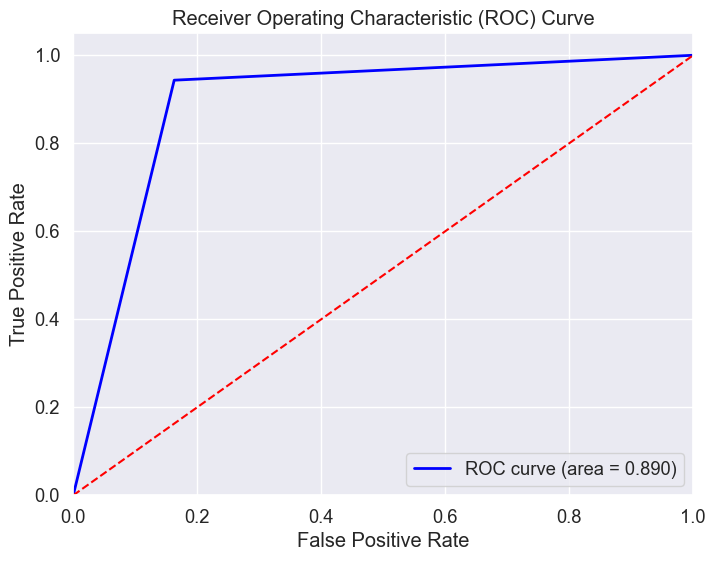

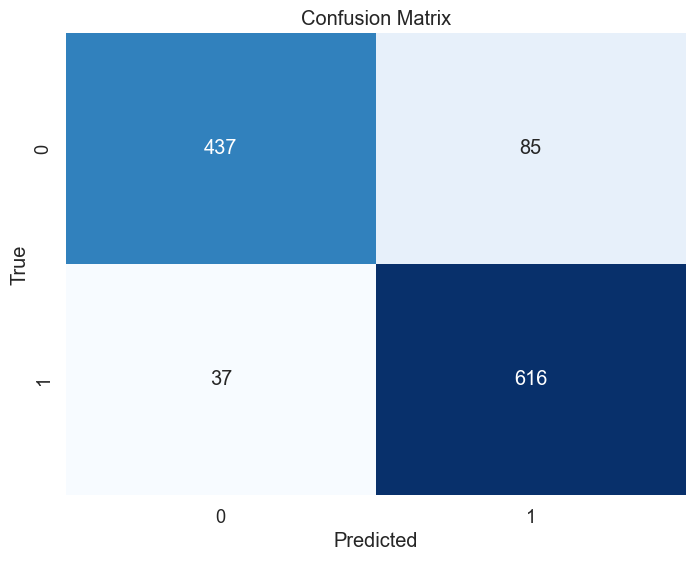

Logistic - Cross-Validation AUC_score: 0.8902515944682075
Logistic - Cross-Validation Accuracy: 0.8961702127659574
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       522
           1       0.88      0.94      0.91       653

    accuracy                           0.90      1175
   macro avg       0.90      0.89      0.89      1175
weighted avg       0.90      0.90      0.90      1175

Logistic - Cross-Validation F1 Scores: [0.85024263 0.94820018 0.91274771 0.89588235 0.90524856 0.86096257
 0.89402174 0.87834225 0.89465786 0.89522388]
Logistic - Cross-Validation Average F1 Score with variance: (0.8935529718154637, 0.0006670486563590575)


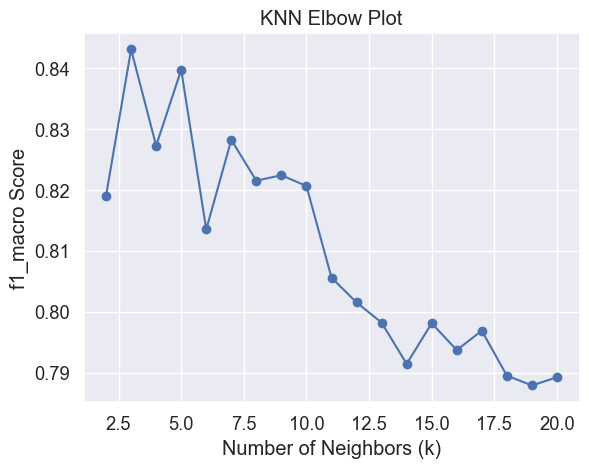

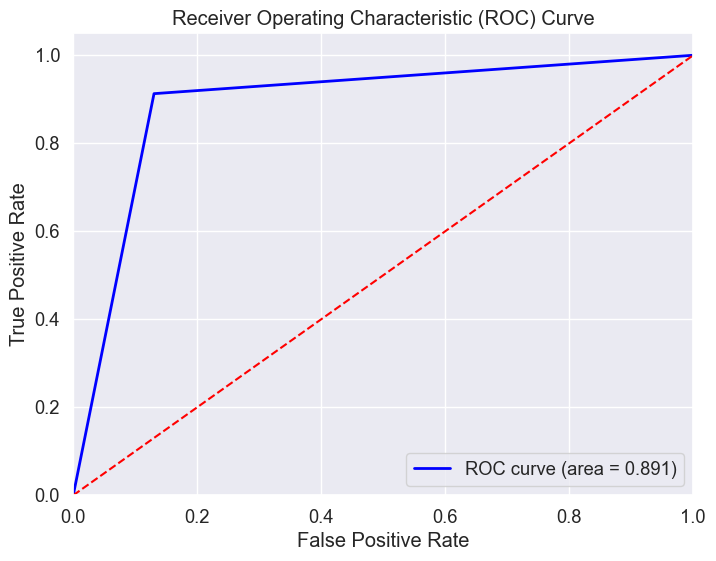

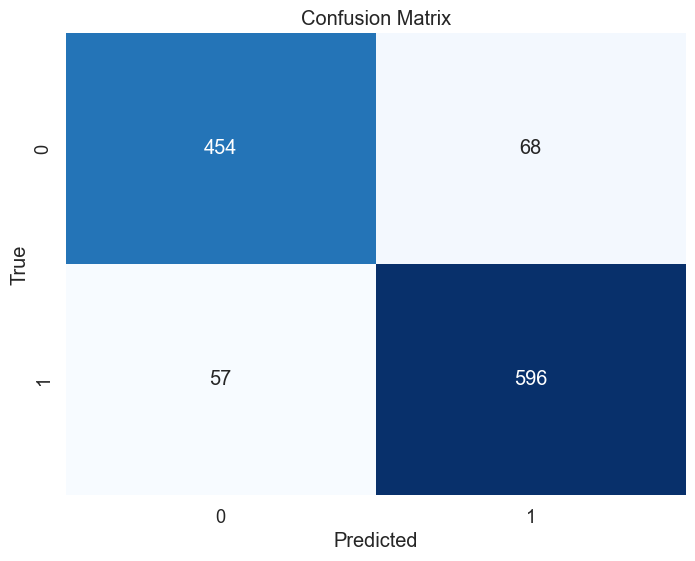

Optimal k: 3
KNN - Cross-Validation AUC_score: 0.8912211836909518
KNN - Cross-Validation Accuracy: 0.8936170212765957
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       522
           1       0.90      0.91      0.91       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

KNN - Cross-Validation F1 Scores: [0.83557022 0.94015794 0.91323529 0.91436865 0.92169874 0.86299766
 0.93076923 0.87884615 0.88554444 0.83524791]
KNN - Cross-Validation Average F1 Score with variance: (0.8918436228185813, 0.001311625853457748)


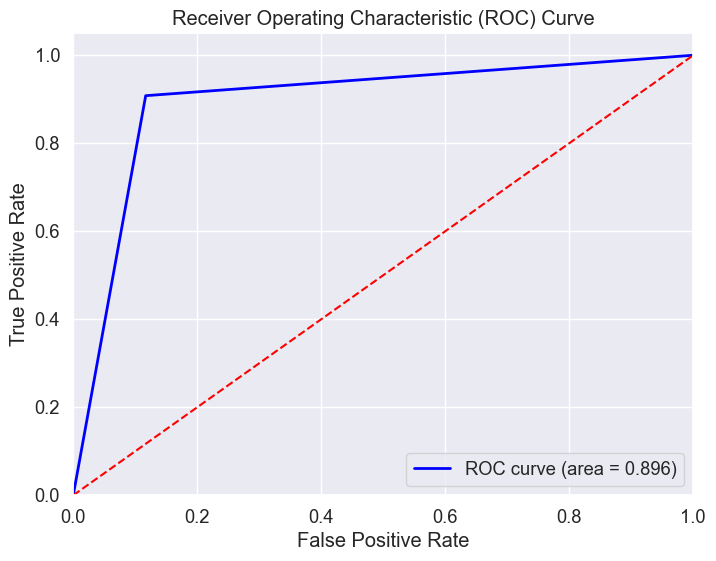

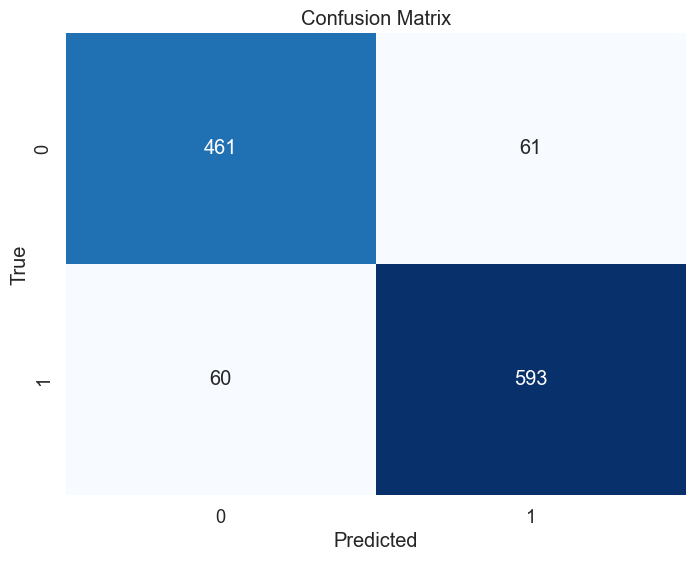

Decision Tree - Cross-Validation AUC_score: 0.8956290741816432
Decision Tree - Cross-Validation Accuracy: 0.8970212765957447
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       522
           1       0.91      0.91      0.91       653

    accuracy                           0.90      1175
   macro avg       0.90      0.90      0.90      1175
weighted avg       0.90      0.90      0.90      1175

Decision Tree - Cross-Validation F1 Scores: [0.91338641 0.89949982 0.88847109 0.89720035 0.8929892 ]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.8983093731393103, 7.101204013911265e-05)


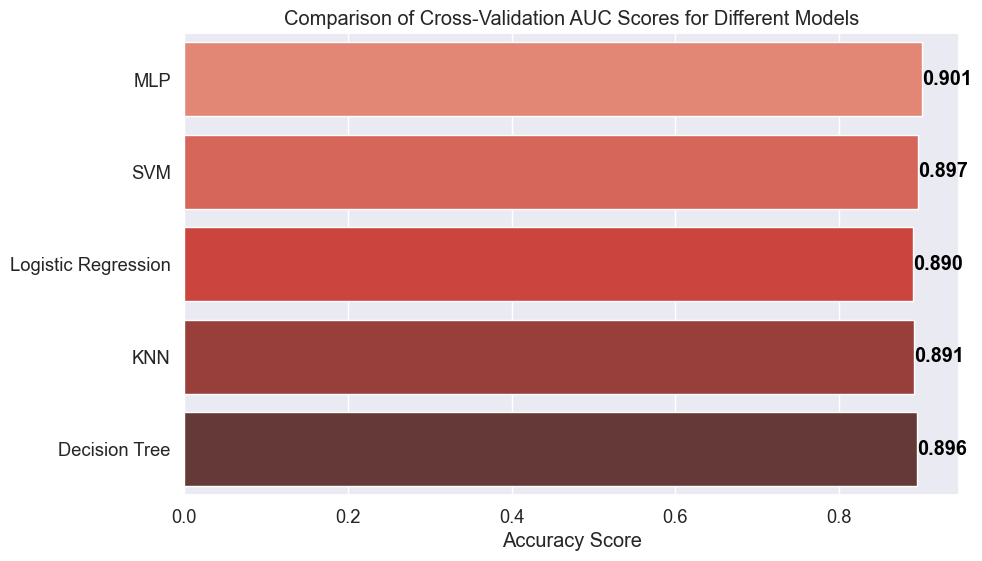

In [24]:
auc_scores = []

for func in functions:
    au = func(X1, y1)[2]
    auc_scores.append(au)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=auc_scores, y=labels, palette="Reds_d")
plt.xlabel('Accuracy Score')
plt.title('Comparison of Cross-Validation AUC Scores for Different Models')

# Add values on top of the bars with 3 decimal places
for i, v in enumerate(auc_scores):
    ax.text(v, i, f'{v:.3f}', va='center', color='black', fontweight='bold')

plt.show()

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

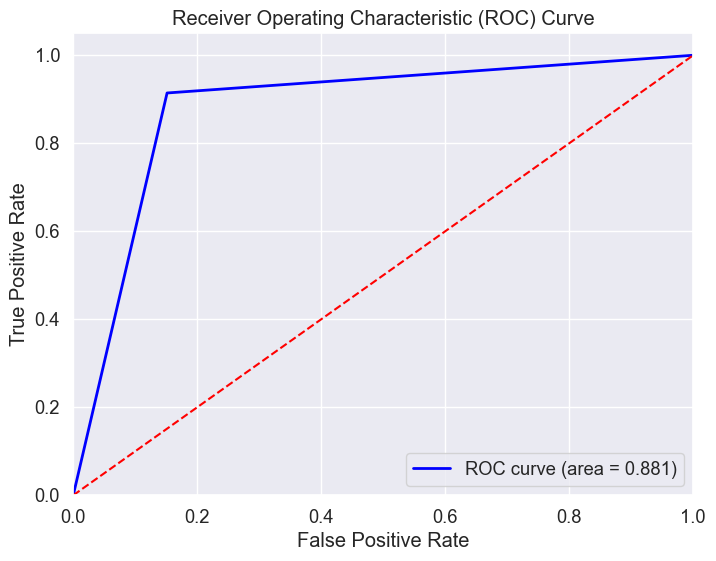

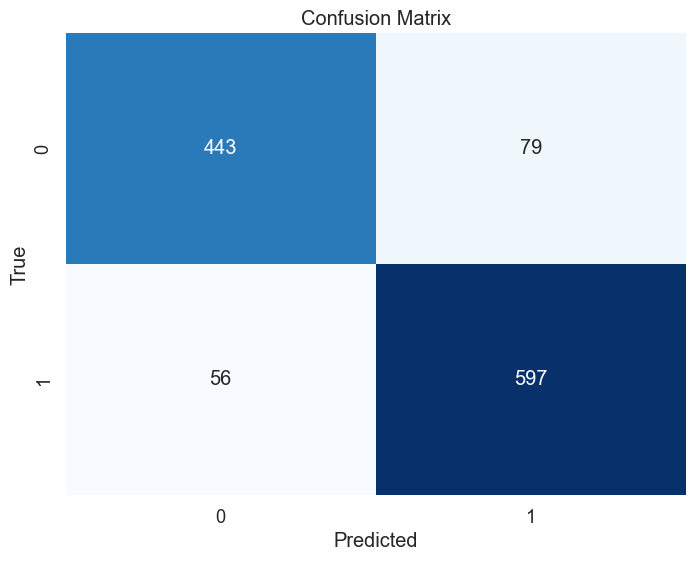

MLP - Cross-Validation AUC_score: 0.8814504820075925
MLP - Accuracy: 0.8851063829787233
MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       522
           1       0.88      0.91      0.90       653

    accuracy                           0.89      1175
   macro avg       0.89      0.88      0.88      1175
weighted avg       0.89      0.89      0.88      1175

MLP - Cross-Validation F1 Scores: [0.85024263 0.91486291 0.91220238 0.88749542 0.87176701 0.9131016
 0.9131016  0.85363161 0.87776119 0.83451202]
MLP - Cross-Validation Average F1 Score with variance: (0.8828678386064268, 0.000814052836093855)


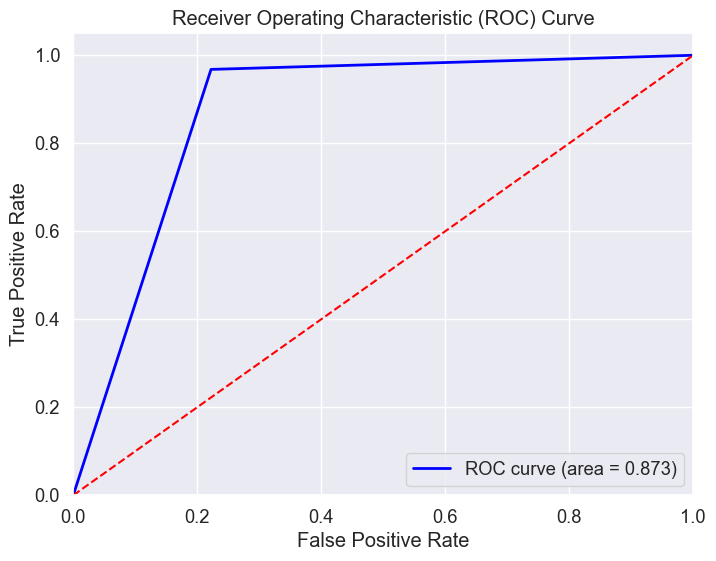

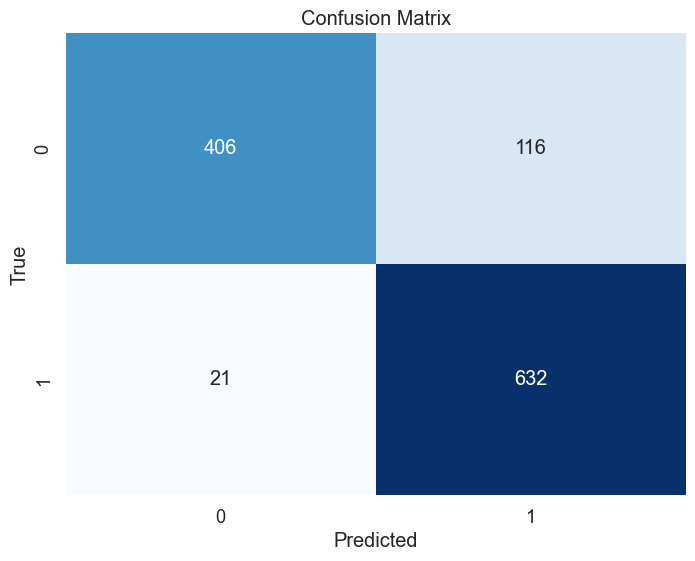

SVM - Cross-Validation AUC_score: 0.8728092564233452
SVM - Cross-Validation Accuracy: 0.8834042553191489
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       522
           1       0.84      0.97      0.90       653

    accuracy                           0.88      1175
   macro avg       0.90      0.87      0.88      1175
weighted avg       0.89      0.88      0.88      1175

SVM - Cross-Validation F1 Scores: [0.84667125 0.88465298 0.80067568 0.84087504 0.92211221 0.89402174
 0.92121212 0.95622896 0.86616335 0.85032734]
SVM - Cross-Validation Average F1 Score with variance: (0.8782940662873207, 0.0019477724605488818)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

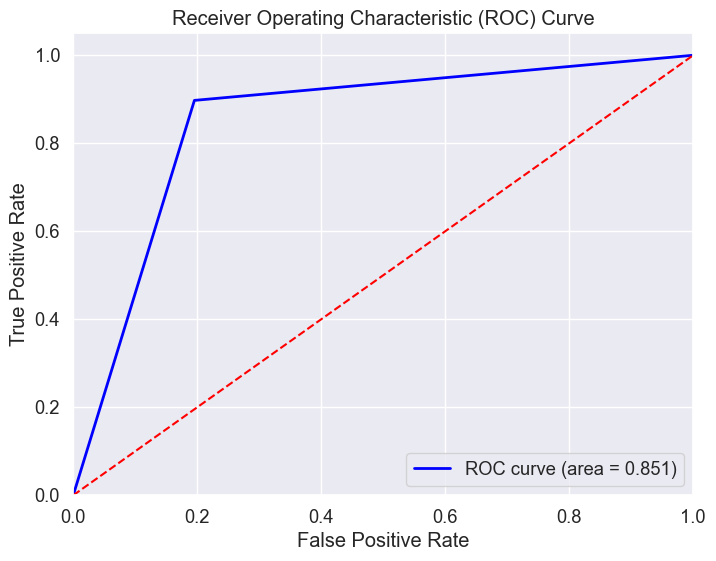

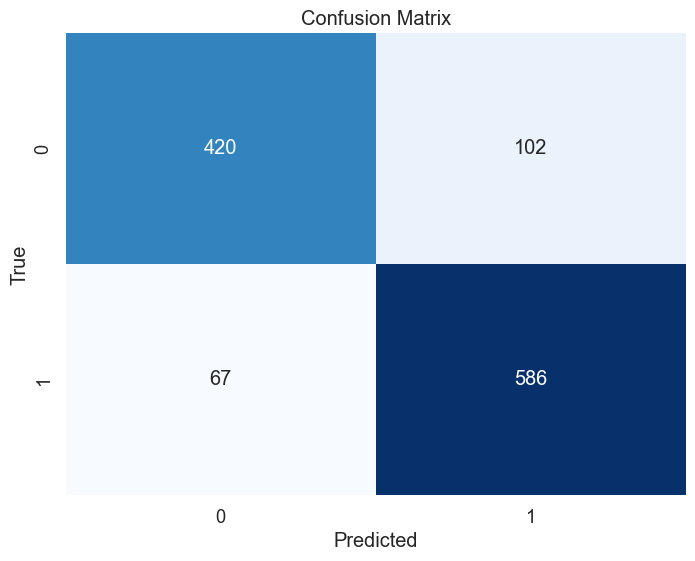

Logistic - Cross-Validation AUC_score: 0.8509971660417877
Logistic - Cross-Validation Accuracy: 0.8561702127659574
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       522
           1       0.85      0.90      0.87       653

    accuracy                           0.86      1175
   macro avg       0.86      0.85      0.85      1175
weighted avg       0.86      0.86      0.86      1175

Logistic - Cross-Validation F1 Scores: [0.80911765 0.90563431 0.90480381 0.85122005 0.86186713 0.8399696
 0.86993256 0.82753538 0.81790558 0.84198679]
Logistic - Cross-Validation Average F1 Score with variance: (0.8529972880599273, 0.0009919319991514956)


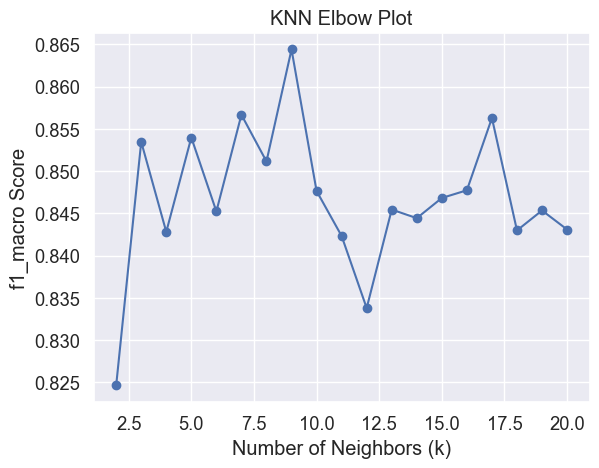

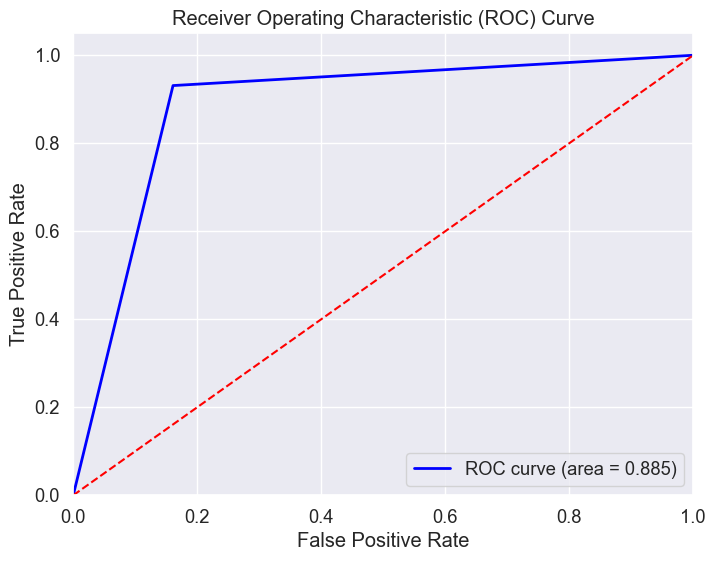

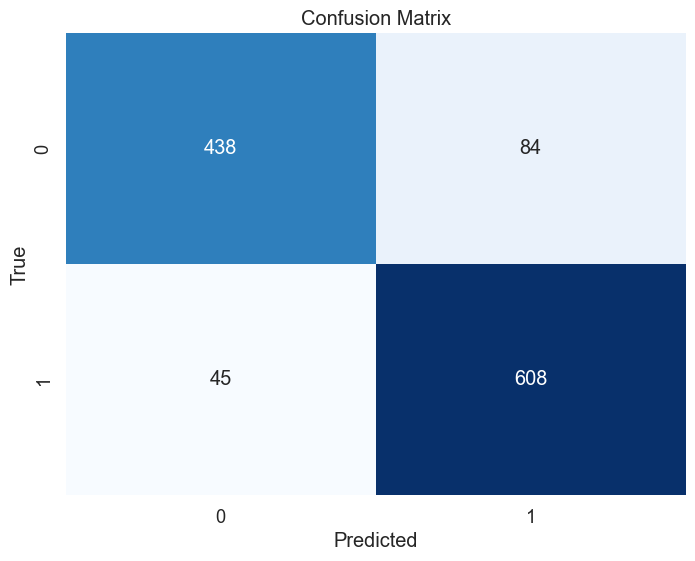

Optimal k: 9
KNN - Cross-Validation AUC_score: 0.8850838746017496
KNN - Cross-Validation Accuracy: 0.8902127659574468
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       522
           1       0.88      0.93      0.90       653

    accuracy                           0.89      1175
   macro avg       0.89      0.89      0.89      1175
weighted avg       0.89      0.89      0.89      1175

KNN - Cross-Validation F1 Scores: [0.87623614 0.93123543 0.87852941 0.89588235 0.87913374 0.92195953
 0.8693516  0.88619529 0.86868687 0.86993256]
KNN - Cross-Validation Average F1 Score with variance: (0.8877142923128428, 0.0004441008100274146)


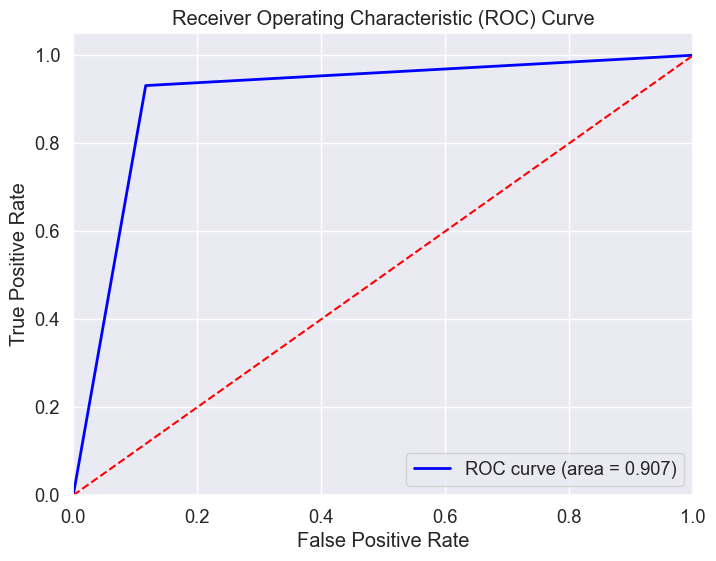

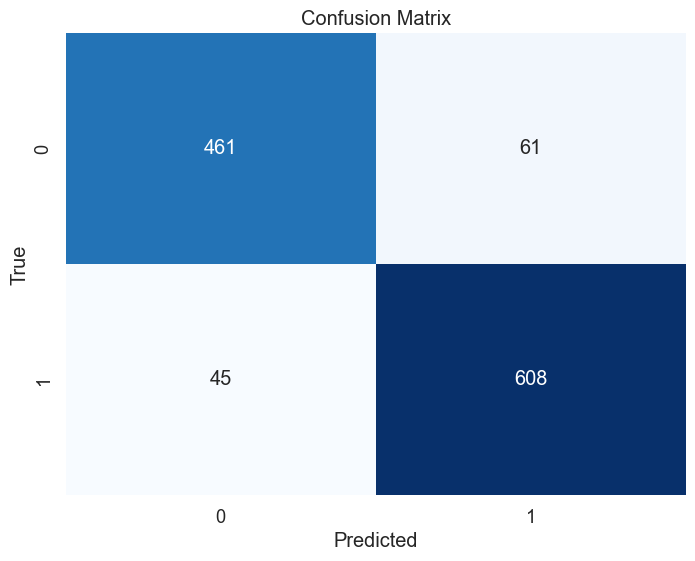

Decision Tree - Cross-Validation AUC_score: 0.9071145259427459
Decision Tree - Cross-Validation Accuracy: 0.9097872340425532
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       522
           1       0.91      0.93      0.92       653

    accuracy                           0.91      1175
   macro avg       0.91      0.91      0.91      1175
weighted avg       0.91      0.91      0.91      1175

Decision Tree - Cross-Validation F1 Scores: [0.90050621 0.87481861 0.91780948 0.90531136 0.87529506]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.8947481447488231, 0.00029043411578589406)


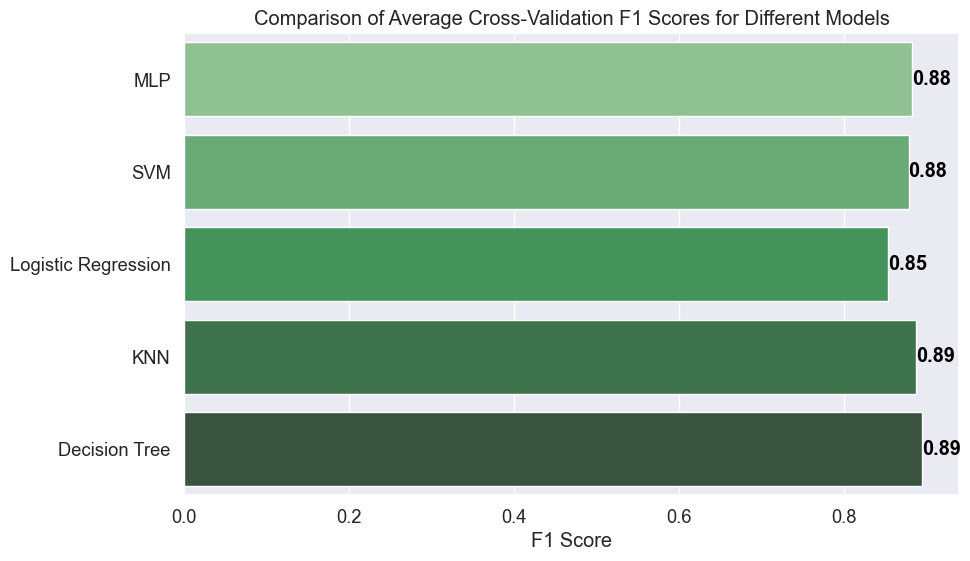

In [25]:
f1_scores1 = []
functions = [multiclass_cv_mlp, multiclass_cv_svm, multiclass_cv_logistic_regression, knn_elbow_cv, multiclass_cv_decision_tree]

for func in functions:
    f1_1 = func(X2, y2)[0].mean()
    f1_scores1.append(f1_1)

# Create labels for the bar plot
labels = ["MLP", "SVM", "Logistic Regression", "KNN", "Decision Tree"]

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=f1_scores1, y=labels, palette="Greens_d")
plt.xlabel('F1 Score')
plt.title('Comparison of Average Cross-Validation F1 Scores for Different Models')

# Add values on top of the bars with 2 decimal places
for i, v in enumerate(f1_scores1):
    ax.text(v, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

plt.show()